# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_folder = "output_data"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#Create lists of variables
new_cities = []
lat = []
lng = []
mxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set url for API calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

print("--------------------------")
print("Begining Data Retrieval")
print("--------------------------")

response_counter = 1

#Loop through cities to find data
for city in cities:
        
    #Use exceptions while searching for data
    try:
        response = (requests.get(url + "&q=" + city)).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f'Processing number {response_counter} of {len(cities)} | {city}')
        response_counter += 1
        # Add a one second interval between queries to stay within API query limits
        time.sleep(2)
        
    except KeyError:
        print("City not found. Skipping...")
        response_counter += 1
        pass
    
print('---------------------------')
print('Data Retreival Complete')
print('---------------------------')

--------------------------
Begining Data Retrieval
--------------------------
Processing number 1 of 614 | castro
Processing number 2 of 614 | klaksvik
Processing number 3 of 614 | akyab
Processing number 4 of 614 | rikitea
Processing number 5 of 614 | upernavik
Processing number 6 of 614 | albany
Processing number 7 of 614 | sao filipe
City not found. Skipping...
Processing number 9 of 614 | severo-kurilsk
Processing number 10 of 614 | hobart
Processing number 11 of 614 | tasiilaq
Processing number 12 of 614 | zhezkazgan
Processing number 13 of 614 | strezhevoy
Processing number 14 of 614 | dikson
Processing number 15 of 614 | sultepec
Processing number 16 of 614 | saint-philippe
Processing number 17 of 614 | tuktoyaktuk
Processing number 18 of 614 | vaini
Processing number 19 of 614 | hithadhoo
Processing number 20 of 614 | bonavista
Processing number 21 of 614 | custoias
Processing number 22 of 614 | puerto ayora
City not found. Skipping...
Processing number 24 of 614 | avarua
Proce

Processing number 212 of 614 | thompson
City not found. Skipping...
Processing number 214 of 614 | coihaique
Processing number 215 of 614 | kupang
City not found. Skipping...
Processing number 217 of 614 | luderitz
Processing number 218 of 614 | tiarei
City not found. Skipping...
Processing number 220 of 614 | port moresby
Processing number 221 of 614 | souillac
Processing number 222 of 614 | biak
City not found. Skipping...
Processing number 224 of 614 | pipri
City not found. Skipping...
Processing number 226 of 614 | ancud
Processing number 227 of 614 | dalvik
Processing number 228 of 614 | tanout
Processing number 229 of 614 | xai-xai
Processing number 230 of 614 | ilulissat
Processing number 231 of 614 | wajir
Processing number 232 of 614 | asosa
Processing number 233 of 614 | otavi
Processing number 234 of 614 | mar del plata
Processing number 235 of 614 | henties bay
Processing number 236 of 614 | santarem
Processing number 237 of 614 | san quintin
Processing number 238 of 614 | 

City not found. Skipping...
Processing number 423 of 614 | vao
Processing number 424 of 614 | luanda
Processing number 425 of 614 | deputatskiy
Processing number 426 of 614 | baherden
Processing number 427 of 614 | jalingo
City not found. Skipping...
Processing number 429 of 614 | banda aceh
Processing number 430 of 614 | arlit
Processing number 431 of 614 | bombay
Processing number 432 of 614 | semypolky
Processing number 433 of 614 | belousovka
Processing number 434 of 614 | kemijarvi
Processing number 435 of 614 | lenggries
Processing number 436 of 614 | zamora
Processing number 437 of 614 | horta
Processing number 438 of 614 | praya
Processing number 439 of 614 | buala
Processing number 440 of 614 | champerico
Processing number 441 of 614 | mogadishu
Processing number 442 of 614 | igarka
Processing number 443 of 614 | nova praha
Processing number 444 of 614 | puerto asis
Processing number 445 of 614 | ceres
Processing number 446 of 614 | anito
Processing number 447 of 614 | kaitang

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a DataFrame
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Temperature": mxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data_df = pd.DataFrame(weather_dict)

#Save DataFrame as CSV
pd.DataFrame.to_csv(weather_data_df, '../weather_data_df.csv')

#Display DF
weather_data_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.79,-50.01,62.53,80,98,6.71,BR,1596036790
1,klaksvik,62.23,-6.59,50.00,87,100,19.46,FO,1596036793
2,akyab,20.15,92.90,82.83,85,100,8.08,MM,1596036795
3,rikitea,-23.12,-134.97,72.57,80,11,11.59,PF,1596036771
4,upernavik,72.79,-56.15,43.32,91,100,4.32,GL,1596036799


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
weather_data_humidity = weather_data_df.loc[weather_data_df["Humidity"] > 100]
weather_data_humidity

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

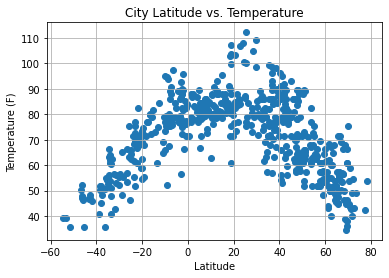

In [35]:
#Plot latitude vs temperature and save as .png
plt.scatter(weather_data_df['Lat'], weather_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

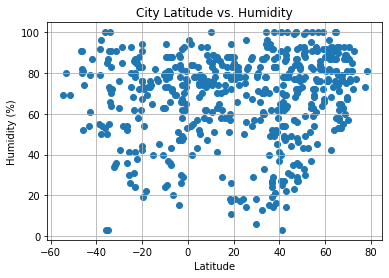

In [36]:
#Plot latitude vs humidity and save as .png
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png')

## Latitude vs. Cloudiness Plot

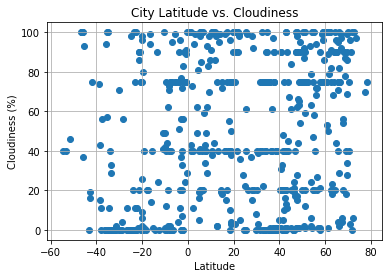

In [50]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

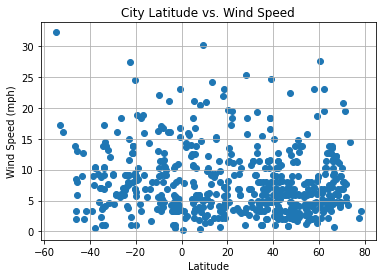

In [52]:
plt.scatter(weather_data_df["Lat"], weather_data_df['Wind Speed'])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind_speed.png')

## Linear Regression

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float) > 0, :]
southern_df = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.685756487695045
The further you move away from the equator, the more the temperature decreases


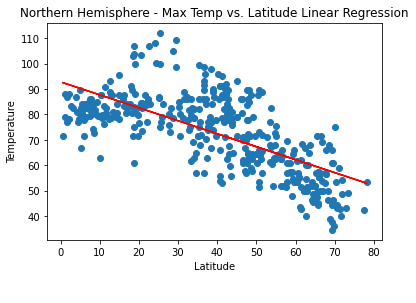

In [54]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The further you move away from the equator, the more the temperature decreases")
plt.savefig('north_temp_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8450205429298502
The closer you move to the equator, the temperature increases


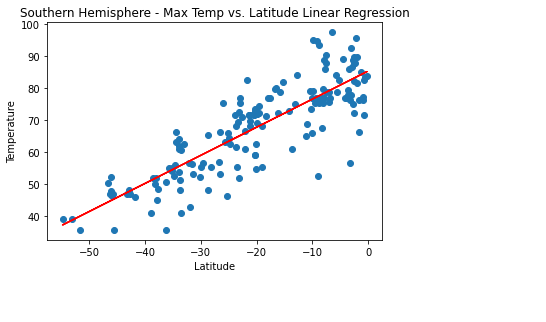

In [55]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The closer you move to the equator, the temperature increases")
plt.savefig('south_temp_lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09346556682425458
There does not appear to be a strong correlative relationship between humidity and latitude


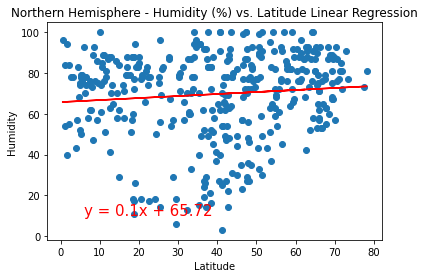

In [56]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between humidity and latitude")
plt.savefig('north_humid_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.088679044644056
There does not appear to be a strong correlative relationship between humidity and latitude


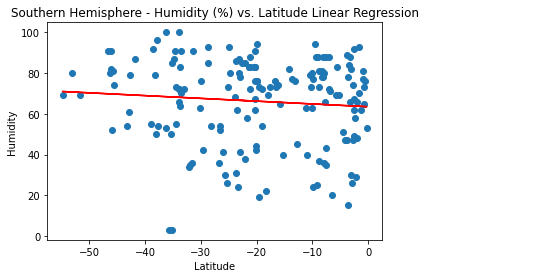

In [57]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between humidity and latitude")
plt.savefig('south_humid_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 50.5
The r-squared is: 0.03746441229187809
There does not appear to be a strong correlative relationship between cloudiness and latitude


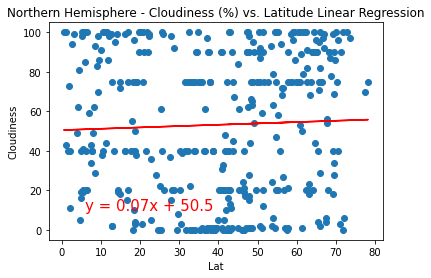

In [58]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between cloudiness and latitude")
plt.savefig('north_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08882529728030909
There does not appear to be a strong correlative relationship between cloudiness and latitude


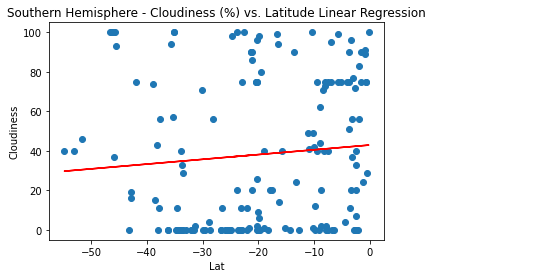

In [59]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between cloudiness and latitude")
plt.savefig('south_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06762783780088293
There does not appear to be a strong correlative relationship between wind speed and latitude


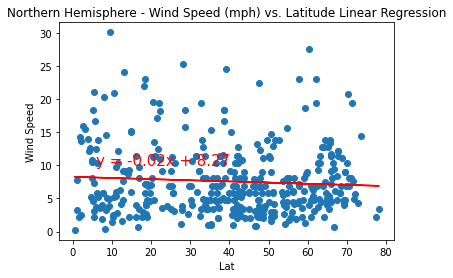

In [60]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between wind speed and latitude")
plt.savefig('north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08994808051123156
There does not appear to be a strong correlative relationship between cloudiness and latitude


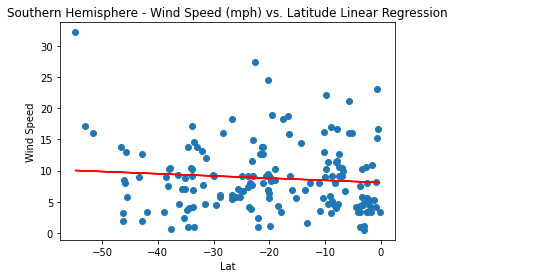

In [61]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There does not appear to be a strong correlative relationship between cloudiness and latitude")
plt.savefig('south_wind_lat.png')
plt.show()